In [4]:
# Welcome to your new notebook
# Type here in the cell editor to add code!
# Load glucose data from Lakehouse
df = spark.read.table("glucose_demo_data")
display(df)


StatementMeta(, 647573f6-77b4-48a0-93e2-90843d721292, 8, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, f222aafa-2388-4b78-bf87-c5fe46f59268)

StatementMeta(, 647573f6-77b4-48a0-93e2-90843d721292, 9, Finished, Available, Finished)

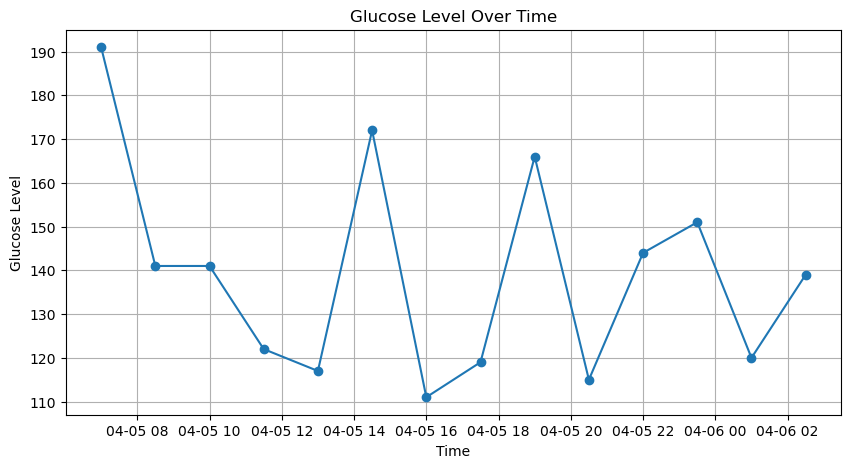

In [5]:
# Convert timestamp to datetime
from pyspark.sql.functions import to_timestamp

df = df.withColumn("timestamp", to_timestamp(df["timestamp"]))
df = df.orderBy("timestamp")

# Plot glucose over time
import matplotlib.pyplot as plt

pandas_df = df.toPandas()
plt.figure(figsize=(10,5))
plt.plot(pandas_df['timestamp'], pandas_df['glucose_level'], marker='o')
plt.xlabel("Time")
plt.ylabel("Glucose Level")
plt.title("Glucose Level Over Time")
plt.grid(True)
plt.show()


In [6]:
df.write.mode("overwrite").saveAsTable("glucose_analysis")


StatementMeta(, 647573f6-77b4-48a0-93e2-90843d721292, 10, Finished, Available, Finished)

In [7]:
df = spark.read.load("Tables/glucose_demo_data")  # adjust path if needed

high_glucose = df.filter(df.glucose_level > 140)

# Save as a new table for alert triggering
high_glucose.write.mode("overwrite").saveAsTable("high_glucose_alerts")


StatementMeta(, 647573f6-77b4-48a0-93e2-90843d721292, 11, Finished, Available, Finished)

In [13]:
import os
from openai import AzureOpenAI
from azure.core.credentials import AzureKeyCredential

client = AzureOpenAI(
    api_version="2024-12-01-preview",
    azure_endpoint="https://jacks-m98g2avr-eastus2.cognitiveservices.azure.com/",
    credential=AzureKeyCredential("VQfdhu13znue0Mh3aQ1xYbIsUbCOzocmpJH0K5KcqXW79cKpQwgvJQQJ99BDACHYHv6XJ3w3AAAAACOGJOjT")
)

messages = [
    {
        "role": "user",
        "content": [{"type": "text", "text": "Suggest foods for someone with high blood sugar"}]
    }
]

completion = client.chat.completions.create(
    model="gpt-4",  # or whatever your deployment name is
    messages=messages
)

print(completion.choices[0].message.content)



StatementMeta(, 647573f6-77b4-48a0-93e2-90843d721292, 21, Finished, Available, Finished)

TypeError: AzureOpenAI.__init__() got an unexpected keyword argument 'credential'

In [9]:
import os  
import base64
from openai import AzureOpenAI  
from azure.identity import DefaultAzureCredential, get_bearer_token_provider  
        
endpoint = os.getenv("ENDPOINT_URL", "https://jacks-m98g2avr-eastus2.openai.azure.com/")  
deployment = os.getenv("DEPLOYMENT_NAME", "gpt-4")  
      
# Initialize Azure OpenAI Service client with Entra ID authentication
token_provider = get_bearer_token_provider(  
    DefaultAzureCredential(),  
    "https://cognitiveservices.azure.com/.default"  
)  
  
client = AzureOpenAI(  
    azure_endpoint=endpoint,  
    azure_ad_token_provider=token_provider,  
    api_version="2024-05-01-preview",  
)  
  

# IMAGE_PATH = "YOUR_IMAGE_PATH"
# encoded_image = base64.b64encode(open(IMAGE_PATH, 'rb').read()).decode('ascii')
chat_prompt = [
    {
        "role": "user",
        "content": [
            {
                "type": "text",
                "text": "hey"
            }
        ]
    },
    {
        "role": "assistant",
        "content": [
            {
                "type": "text",
                "text": "Hello! How can I help you today?"
            }
        ]
    }
] 
  
# Include speech result if speech is enabled  
messages = chat_prompt 

completion = client.chat.completions.create(  
    model=deployment,  
    messages=messages,
    max_tokens=800,  
    temperature=0.7,  
    top_p=0.95,  
    frequency_penalty=0,  
    presence_penalty=0,
    stop=None,  
    stream=False  
)  
  
print(completion.to_json())  

StatementMeta(, 647573f6-77b4-48a0-93e2-90843d721292, 13, Finished, Available, Finished)

TypeError: Client.__init__() got an unexpected keyword argument 'proxies'

In [8]:
import requests
import json

# GPT credentials
api_key = "VQfdhu13znue0Mh3aQ1xYbIsUbCOzocmpJH0K5KcqXW79cKpQwgvJQQJ99BDACHYHv6XJ3w3AAAAACOGJOjT"
endpoint = "https://jacks-m98g2avr-eastus2.cognitiveservices.azure.com/openai/deployments/gpt-4/chat/completions?api-version=2025-01-01-preview"  # example: https://<your-resource>.openai.azure.com/openai/deployments/gpt-35-turbo/chat/completions?api-version=2023-07-01-preview

headers = {
    "Content-Type": "application/json",
    "api-key": api_key
}

# Example prompt
prompt = "Suggest healthy foods for a person with high glucose levels."

data = {
    "messages": [{"role": "user", "content": prompt}],
    "temperature": 0.7
}

response = requests.post(endpoint, headers=headers, json=data)
result = response.json()
print(result['choices'][0]['message']['content'])


StatementMeta(, 647573f6-77b4-48a0-93e2-90843d721292, 12, Finished, Available, Finished)

KeyError: 'choices'